In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import learning_curve
import warnings
warnings.filterwarnings('ignore')
     

In [2]:
from google.colab import files
uploaded = files.upload()

Saving spambase.csv to spambase.csv


In [3]:
dataset = pd.read_csv('spambase.csv')
dataset.head()

,0,0.64,0.64.1,0.1,0.32,0.2,0.3,0.4,0.5,0.6,...,0.41,0.42,0.43,0.778,0.44,0.45,3.756,61,278,1
0,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
1,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
2,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,...,0.00,0.223,0.0,0.000,0.000,0.000,3.000,15,54,1


In [4]:
dataset.shape

(4600, 58)

In [5]:
dataset.isnull().sum()


0         0
0.64      0
0.64.1    0
0.1       0
0.32      0
0.2       0
0.3       0
0.4       0
0.5       0
0.6       0
0.7       0
0.64.2    0
0.8       0
0.9       0
0.10      0
0.32.1    0
0.11      0
1.29      0
1.93      0
0.12      0
0.96      0
0.13      0
0.14      0
0.15      0
0.16      0
0.17      0
0.18      0
0.19      0
0.20      0
0.21      0
0.22      0
0.23      0
0.24      0
0.25      0
0.26      0
0.27      0
0.28      0
0.29      0
0.30      0
0.31      0
0.33      0
0.34      0
0.35      0
0.36      0
0.37      0
0.38      0
0.39      0
0.40      0
0.41      0
0.42      0
0.43      0
0.778     0
0.44      0
0.45      0
3.756     0
61        0
278       0
1         0
dtype: int64

In [7]:
dataset = dataset.drop(['0','0.64'],axis=1)


<Axes: xlabel='1', ylabel='count'>

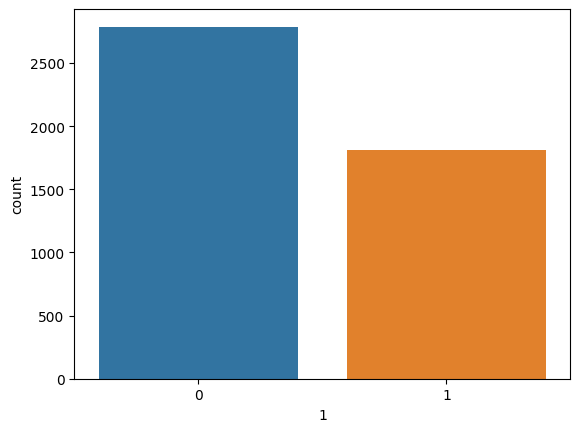

In [8]:
sns.countplot(x = '1', data=dataset)

In [9]:
X = dataset.iloc[:,0:-1]
y = dataset['1']

In [10]:
ss = StandardScaler()
ss.fit_transform(X)


array([[ 4.35261246e-01, -4.69046925e-02, -2.56086947e-01, ...,
        -2.45283780e-03,  2.50545504e-01,  1.22818869e+00],
       [ 8.51832832e-01, -4.69046925e-02,  1.36470015e+00, ...,
         1.45895187e-01,  2.22087495e+00,  3.25837649e+00],
       [-5.56575862e-01, -4.69046925e-02,  4.72523765e-01, ...,
        -5.21543111e-02, -6.24495382e-02, -1.52207080e-01],
       ...,
       [ 3.85264032e-02, -4.69046925e-02, -4.64261436e-01, ...,
        -1.19378942e-01, -2.36905791e-01, -2.72600020e-01],
       [-5.56575862e-01, -4.69046925e-02,  1.15659677e-02, ...,
        -1.27478675e-01, -2.42036857e-01, -3.38568754e-01],
       [ 7.32812379e-01, -4.69046925e-02, -4.64261436e-01, ...,
        -1.24232478e-01, -2.42036857e-01, -4.01239052e-01]])

In [11]:
samples = []
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i)
    samples.append((X_train, X_test, y_train, y_test))

In [16]:
samples

[(      0.64.1  0.1  0.32   0.2   0.3   0.4   0.5   0.6   0.7  0.64.2  ...  \
  4452    0.00  0.0  0.00  0.00  0.00  0.00  0.74  0.00  0.00    0.00  ...   
  2457    0.00  0.0  0.00  0.00  0.00  0.00  0.00  0.00  0.00    0.00  ...   
  1390    0.36  0.0  1.44  0.00  0.00  0.00  0.24  1.32  0.72    2.53  ...   
  3402    0.00  0.0  0.00  0.00  0.00  0.00  0.00  0.00  0.00    0.00  ...   
  3197    0.00  0.0  0.00  0.00  0.00  0.00  0.00  0.00  0.00    0.00  ...   
  ...      ...  ...   ...   ...   ...   ...   ...   ...   ...     ...  ...   
  1033    0.27  0.0  0.00  0.00  0.00  0.00  0.00  0.00  0.00    1.62  ...   
  3264    0.00  0.0  0.49  0.49  0.00  0.49  0.00  0.00  0.00    0.49  ...   
  1653    0.19  0.0  0.00  0.00  0.19  0.00  0.00  0.00  0.00    0.19  ...   
  2607    0.00  0.0  0.00  0.00  0.00  0.00  0.00  0.00  0.00    2.85  ...   
  2732    0.20  0.0  0.00  0.00  0.00  0.00  0.00  0.00  0.00    1.03  ...   
  
        0.40   0.41   0.42  0.43  0.778   0.44   0.45  3.756 

In [22]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
result = pd.DataFrame(columns=['Sample', 'Best Accuracy', 'Best Kernel', 'Best Nu', 'Best Epsilon'])
     

In [23]:
def fitnessFunction(kernel, C, gamma):
  svm = SVC(kernel=kernel, C=C, gamma=gamma, max_iter=1000)
  svm.fit(X_train, y_train)
  y_pred = svm.predict(X_test)
  return accuracy_score(y_pred, y_test)

In [24]:
for i in range(len(samples)):
  best_accuracy = 0
  best_C = 0
  best_gamma = 0
  for kernel in kernels:
    X_train, X_test, y_train, y_test = samples[i]
    C = np.random.uniform(0, 10)
    gamma = np.random.uniform(0, 10)
    score = fitnessFunction(kernel, C, gamma)
    if score>best_accuracy:
      best_accuracy = round(score, 2)
      best_C = round(C, 2)
      best_gamma = round(gamma, 2)
      best_kernel = kernel
  print('Best Accuracy = ', best_accuracy, 'Best Kernel = ', best_kernel, 'Best Nu = ', best_C, 'Best Epsilon = ', best_gamma)
  result.loc[i] = [i+1, best_accuracy, best_kernel, best_C, best_gamma]

Best Accuracy =  0.67 Best Kernel =  poly Best Nu =  9.71 Best Epsilon =  7.91
Best Accuracy =  0.69 Best Kernel =  linear Best Nu =  7.24 Best Epsilon =  2.75
Best Accuracy =  0.73 Best Kernel =  linear Best Nu =  3.73 Best Epsilon =  1.1
Best Accuracy =  0.78 Best Kernel =  rbf Best Nu =  0.65 Best Epsilon =  5.98
Best Accuracy =  0.47 Best Kernel =  rbf Best Nu =  8.8 Best Epsilon =  1.75
Best Accuracy =  0.68 Best Kernel =  linear Best Nu =  7.17 Best Epsilon =  5.21
Best Accuracy =  0.46 Best Kernel =  rbf Best Nu =  2.46 Best Epsilon =  4.81
Best Accuracy =  0.73 Best Kernel =  linear Best Nu =  1.99 Best Epsilon =  7.16
Best Accuracy =  0.6 Best Kernel =  poly Best Nu =  1.57 Best Epsilon =  7.04
Best Accuracy =  0.73 Best Kernel =  rbf Best Nu =  0.56 Best Epsilon =  6.17


In [25]:
result


,Sample,Best Accuracy,Best Kernel,Best Nu,Best Epsilon
0,1,0.67,poly,9.71,7.91
1,2,0.69,linear,7.24,2.75
2,3,0.73,linear,3.73,1.10
3,4,0.78,rbf,0.65,5.98
4,5,0.47,rbf,8.80,1.75
5,6,0.68,linear,7.17,5.21
6,7,0.46,rbf,2.46,4.81
7,8,0.73,linear,1.99,7.16
8,9,0.60,poly,1.57,7.04
9,10,0.73,rbf,0.56,6.17


In [26]:
X_train, X_test, y_train, y_test = samples[result['Best Accuracy'].idxmax()]


In [28]:
train_sizes, train_scores, test_scores = learning_curve(SVC(kernel=result['Best Kernel'].iloc[result['Best Accuracy'].idxmax()], 
                                                        C=result['Best Nu'].iloc[result['Best Accuracy'].idxmax()],
                                                        gamma=result['Best Epsilon'].iloc[result['Best Accuracy'].idxmax()],
                                                        max_iter = 1000), X_train, y_train, cv=10, scoring='accuracy', n_jobs=-1,
                                                        train_sizes = np.linspace(0.01, 1.0, 50))


In [29]:
train_sizes

array([  28,   87,  146,  204,  263,  321,  380,  438,  497,  555,  614,
        673,  731,  790,  848,  907,  965, 1024, 1082, 1141, 1200, 1258,
       1317, 1375, 1434, 1492, 1551, 1609, 1668, 1726, 1785, 1844, 1902,
       1961, 2019, 2078, 2136, 2195, 2253, 2312, 2371, 2429, 2488, 2546,
       2605, 2663, 2722, 2780, 2839, 2898])

In [30]:
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

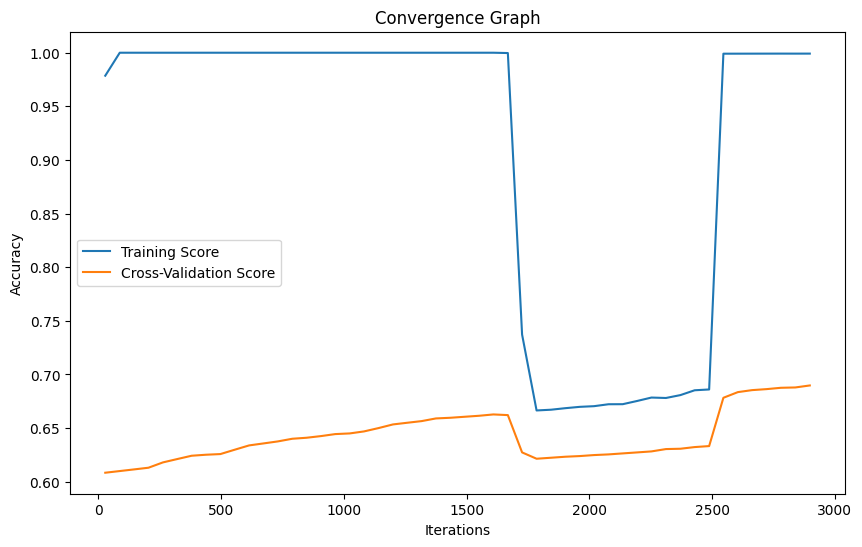

In [31]:
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training Score')
plt.plot(train_sizes, test_mean, label='Cross-Validation Score')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.title('Convergence Graph')
plt.legend(loc="best")
plt.show()